In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import intake
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import rc

PTS_PER_INCH = 72.26999
# Latex text width in points
TEXT_WIDTH_PTS = 505.12177
# Latex column width in points
COLUMN_WIDTH_PTS = TEXT_WIDTH_PTS / 2
# Latex column width in inches
COLUMN_WIDTH_INCHES = COLUMN_WIDTH_PTS / PTS_PER_INCH
# Latex text width in inches
TEXT_WIDTH_INCHES = TEXT_WIDTH_PTS / PTS_PER_INCH
# DPI for figures
DPI = 600

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 8
plt.rcParams['font.weight'] = 'normal'
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.stretch'] = 'extra-condensed'
palette = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"]
sns.set_palette(palette)

color = '#de2d26'
edgecolor = 'black'
width = .5
bar_params = dict(color=palette[1], edgecolor=edgecolor, width=width)
grid_params = dict(color='black', alpha=0.1, which='both')


In [6]:
HOST_URL = 'https://mastapp.site'
PLOT_PATH = Path('./summary')
catalog  = intake.open_catalog(f'{HOST_URL}/intake/catalog.yml')

### Campaign Shot Summary

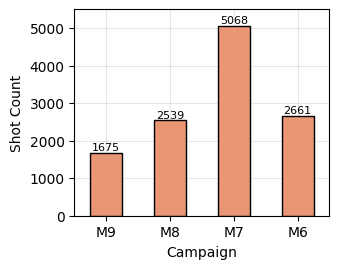

In [177]:
url="http://mastapp.site/json/shots/aggregate?data=shot_id$count&groupby=campaign&sort=-campaign"
df_shots = pd.read_json(url)

fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, 0.8*COLUMN_WIDTH_INCHES))

sns.barplot(df_shots, x='campaign', y='count_shot_id', ax=ax, **bar_params)

ax.set_xlabel('Campaign')
ax.set_ylabel('Shot Count')
ax.set_axisbelow(True)
ax.grid(**grid_params)
ax.bar_label(ax.containers[0], fontsize=8)
ax.set_ylim(0, 5500)

plt.tight_layout()
plt.savefig(PLOT_PATH / 'campaign_shots_summary.pdf', dpi=DPI)

In [178]:

url="http://mastapp.site/json/shots/aggregate?data=timestamp$min,timestamp$max,shot_id$count&groupby=campaign&sort=-campaign"
df = pd.read_json(url)
df

,min_timestamp,max_timestamp,count_shot_id,campaign
0,2012-03-06T14:47:00,2013-09-27T15:20:00,1675,M9
1,2011-01-20T00:00:00,2012-01-27T16:31:00,2539,M8
2,2008-04-02T08:43:00,2011-01-19T15:52:00,5068,M7
3,2006-04-25T13:48:00,2007-07-19T17:28:00,2661,M6


In [179]:
catalog  = intake.open_catalog(f'{HOST_URL}/intake/catalog.yml')
df = pd.DataFrame(catalog.index.level1.signals(shot=30420).read())
df

,description,dimensions,shot_id,version,url,units,quality,shape,provenance,signal_type,uuid,name,rank,source
0,,[time],30420,0,s3://mast/level1/shots/30420.zarr/efm/xpoint1_zc,None,Not Checked,[64],None,Analysed,319404d2-10f1-5c26-87ee-3149180db242,efm/xpoint1_zc,1,efm
1,,[],30420,0,s3://mast/level1/shots/30420.zarr/air/alphacon...,None,Not Checked,[],None,Analysed,76fbeab6-0e2f-58f0-939b-6dd4e99ac691,air/alphaconst_osp,0,air
2,,[],30420,0,s3://mast/level1/shots/30420.zarr/abm/calib_shot,None,Not Checked,[],None,Analysed,afb7d470-1afb-57ab-9f8b-7a1177f28839,abm/calib_shot,0,abm
3,,[dim_0],30420,0,s3://mast/level1/shots/30420.zarr/abm/channel_...,None,Not Checked,[32],None,Analysed,9d4d7d90-99e2-56cb-831c-8b64a7a23244,abm/channel_status,1,abm
4,,[dim_0],30420,0,s3://mast/level1/shots/30420.zarr/abm/channel_...,None,Not Checked,[32],None,Analysed,c3405cd4-06cc-59ba-b6f7-65e5032e7e9b,abm/channel_type,1,abm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,,"[hcam_l_channel, time]",30420,-1,s3://mast/level1/shots/30420.zarr/hcam_l,None,Not Checked,"[36, 300000]",None,Raw,cdbb8a91-8e3a-5411-9cea-670bc546dca0,hcam_l,2,xsx
1851,,"[hcam_u_channel, time]",30420,-1,s3://mast/level1/shots/30420.zarr/hcam_u,None,Not Checked,"[36, 300000]",None,Raw,6cfe584f-276a-5c79-9612-0ee4de158919,hcam_u,2,xsx
1852,,[time],30420,-1,s3://mast/level1/shots/30420.zarr/xsx/relay_mo...,None,Not Checked,[300000],None,Raw,30084190-10ca-5cbb-b9fb-48216c98304f,xsx/relay_monitor,1,xsx
1853,,"[tcam_channel, time]",30420,-1,s3://mast/level1/shots/30420.zarr/tcam,None,Not Checked,"[36, 300000]",None,Raw,10170616-9105-5a61-8077-4770560c0295,tcam,2,xsx


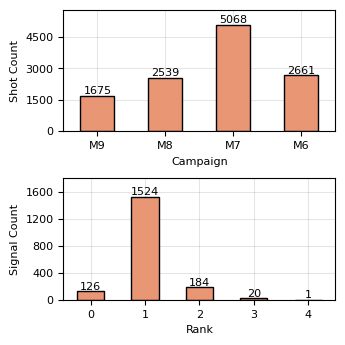

In [196]:
from matplotlib.ticker import MaxNLocator
df['rank'] = df['rank'].astype(str)
count = df.groupby('rank').name.count()

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))
sns.barplot(df_shots, x='campaign', y='count_shot_id', ax=ax, **bar_params)

ax.set_xlabel('Campaign')
ax.set_ylabel('Shot Count')
ax.set_axisbelow(True)
ax.grid(**grid_params)
ax.bar_label(ax.containers[0], fontsize=8)
ax.set_ylim(0, 5800)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

ax=ax2
sns.barplot(count, ax=ax, **bar_params)

ax.set_xlabel('Rank')
ax.set_ylabel('Signal Count')
ax.grid(**grid_params)
ax.set_axisbelow(True)
ax.bar_label(ax.containers[0], fontsize=8)
ax.set_ylim(0, 1800)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))



plt.tight_layout()
plt.savefig(PLOT_PATH / 'summary.pdf', dpi=DPI)

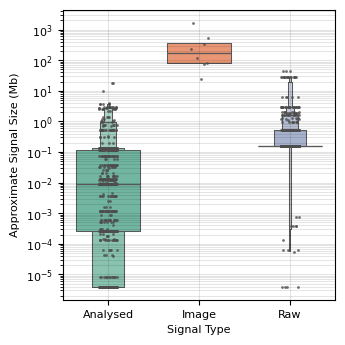

In [197]:
df['nelems'] = df['shape'].map(lambda x: np.prod(x))
df['mb_size'] = (df.nelems * (32/8)) / 1e6

fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))
sns.stripplot(df, x='signal_type', y='mb_size', size=2, color=".3", alpha=0.8, jitter=.1, ax=ax)
# sns.boxplot(df, x='signal_type', y='mb_size', hue='signal_type', ax=ax, showfliers=False)
sns.boxenplot(df, x='signal_type', y='mb_size', hue='signal_type', width=.7, ax=ax, showfliers=False)
ax.set_yscale('log')
ax.set_xlabel('Signal Type')
ax.set_ylabel('Approximate Signal Size (Mb)')
ax.grid(**grid_params, zorder=0)
plt.tight_layout()
plt.savefig(PLOT_PATH / '30420_signal_size.pdf', dpi=DPI)

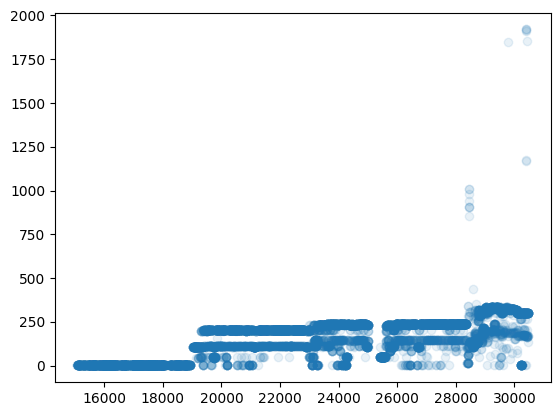

In [51]:
url="http://mastapp.site/json/signals/aggregate?data=url$count&groupby=shot_id&sort=-shot_id&per_page=50000"
df = pd.read_json(url)
df

# fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))

# sns.barplot(df, x='name', y='count_shot_id', ax=ax, **bar_params)

# ax.set_xlabel('Campaign')
# ax.set_ylabel('Shot Count')
# ax.set_axisbelow(True)
# ax.grid(**grid_params)
plt.scatter(df.shot_id, df.count_url, alpha=0.1)

Shot CPF

In [138]:
df = pd.DataFrame(catalog.index.level1.shots().read())
df

,cpf_p05007,cpf_p15661,cpf_p21078,cpf_column_temp_in,cpf_kappa_ipmax,cpf_pnbi_ipmax_sw,cpf_sarea_truby,cpf_tne0_max,cpf_p05008,cpf_p20000,...,cpf_johm_total,cpf_pnbi_ipmax_ss,cpf_sarea_ipmax,cpf_tndl_co2_max,cpf_zeff_truby,cpf_p04993,cpf_p21077,cpf_johm_truby,cpf_sarea_max,cpf_zmag_efit
0,None,None,None,None,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
1,None,None,None,None,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
2,None,None,None,None,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
3,None,None,None,None,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
4,None,None,None,None,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,None,None,None,None,1.930563,0.0,0.0,0.057134,None,None,...,0.094553,2.180491,25.402852,0.19060,None,None,None,0.0,25.416924,0.013202
11939,None,None,None,None,1.938207,0.0,0.0,0.057134,None,None,...,0.095056,1.985447,25.509430,0.05848,None,None,None,0.0,25.541964,0.012445
11940,None,None,None,None,1.933172,0.0,0.0,0.047614,None,None,...,0.074943,2.288206,25.318623,0.17864,None,None,None,0.0,25.418210,0.015299
11941,None,None,None,None,1.924374,0.0,0.0,0.047614,None,None,...,0.236737,2.107413,27.009387,0.06260,None,None,None,0.0,28.405008,0.015164


/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_33464/3029244713.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  summary['hour'] = pd.to_datetime(summary.cpf_exp_time).dt.hour
/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_33464/3029244713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['hour'] = pd.to_datetime(summary.cpf_exp_time).dt.hour


array(['cpf_p05007', 'cpf_p15661', 'cpf_p21078', 'cpf_column_temp_in',
       'cpf_kappa_ipmax', 'cpf_pnbi_ipmax_sw', 'cpf_sarea_truby',
       'cpf_tne0_max', 'cpf_p05008', 'cpf_p20000', 'cpf_p21079',
       'cpf_column_temp_out', 'cpf_kappa_max', 'cpf_pnbi_max', 'cpf_sl',
       'cpf_tpe0_max', 'cpf_p20204', 'preshot_description', 'cpf_p05009',
       'cpf_p21080', 'cpf_creation', 'cpf_kappa_truby', 'cpf_pnbi_max_ss',
       'cpf_summary', 'cpf_tpnbi_max', 'url', 'cpf_p05010', 'cpf_p20205',
       'cpf_p21081', 'cpf_dwmhd_ipmax', 'cpf_li_2_ipmax',
       'cpf_pnbi_max_sw', 'cpf_tamin_max', 'cpf_tpnbi_max_ss',
       'postshot_description', 'cpf_p05015', 'cpf_p20206', 'cpf_p21082',
       'cpf_dwmhd_max', 'cpf_li_2_max', 'cpf_pnbi_truby', 'cpf_tarea_max',
       'cpf_tpnbi_max_sw', 'campaign', 'cpf_p05016', 'cpf_p20207',
       'cpf_p21083', 'cpf_dwmhd_truby', 'cpf_li_2_truby',
       'cpf_pnbi_truby_ss', 'cpf_tautot_ipmax', 'cpf_tpohm_max',
       'current_range', 'cpf_p05017', 'cpf_

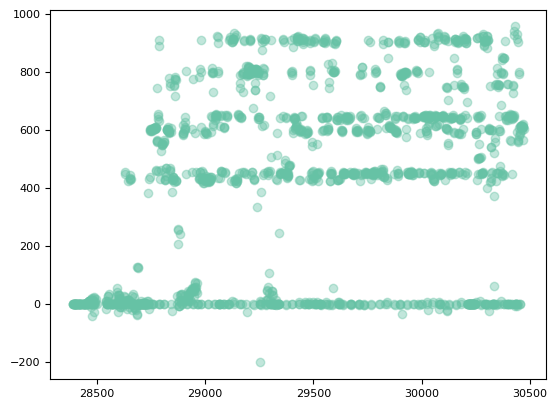

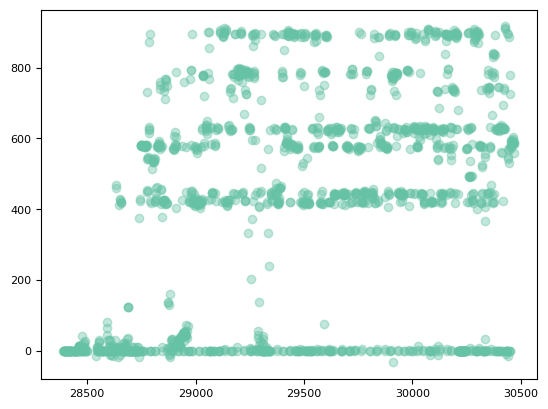

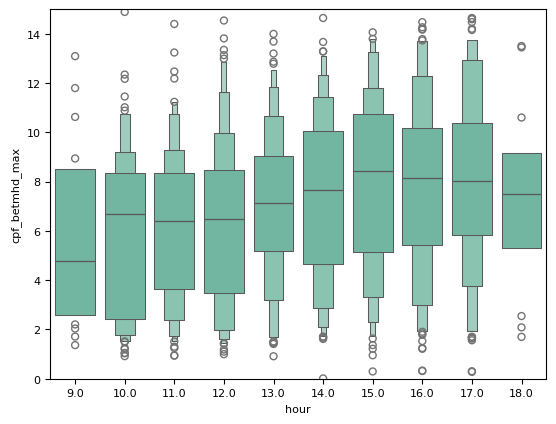

In [75]:
summary = df.loc[df.campaign == 'M9']
summary['hour'] = pd.to_datetime(summary.cpf_exp_time).dt.hour

plt.figure()
plt.scatter(summary.shot_id, summary.cpf_ip_max, alpha=0.4)

plt.figure()
plt.scatter(summary.shot_id, summary.cpf_ip_av, alpha=0.4)


plt.figure()
sns.boxenplot(summary, x='hour', y='cpf_betmhd_max')
plt.ylim(0, 15)


# plt.scatter(summary.cpf_ip_av, summary.cpf_betmhd_ipmax, alpha=0.4)
summary.columns.values

### Plasma Beta v.s Confinement Time

This plot can show how the efficiency of energy confinement varies with plasma pressure.

Text(0.5, 0, 'Plasma Beta $\\beta$ (%)')

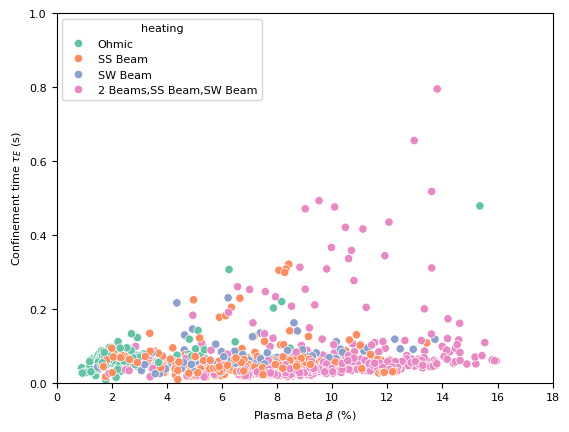

In [134]:
plt.figure()
sns.scatterplot(summary, y='cpf_tautot_max', x='cpf_betmhd_max', hue='heating')
plt.xlim(0, 18)
plt.ylim(0, 1)
# plt.yscale('log')
plt.ylabel('Confinement time $\\tau_E$ (s)')
plt.xlabel('Plasma Beta $\\beta$ (%)')

### Plasma Temperature vs. Plasma Density
This can reveal the relationship between temperature and density, which is critical for achieving the conditions necessary for fusion.

Text(0.5, 0, 'Density $n_e$ ($m^{-3}$)')

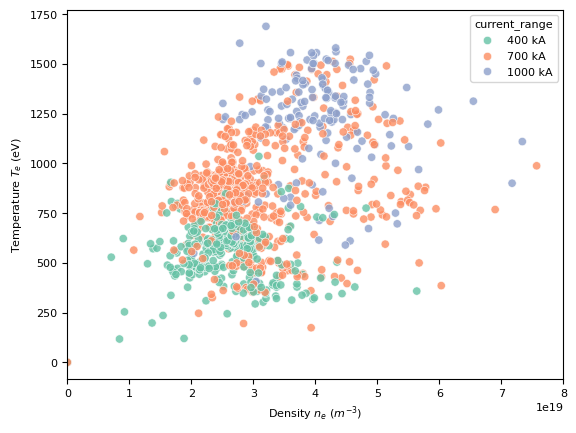

In [135]:
plt.figure()
sns.scatterplot(summary, y='cpf_te0_ipmax', x='cpf_ne0_ipmax', hue='current_range', alpha=0.8)
plt.xlim(0, .8e20)
plt.ylabel('Temperature $T_e$ (eV)')
plt.xlabel('Density $n_e$ ($m^{-3}$)')

### Heating Power vs. Energy Stored
This plot can illustrate how effectively the input power is converted into stored energy in the plasma.

(0.0, 0.3)

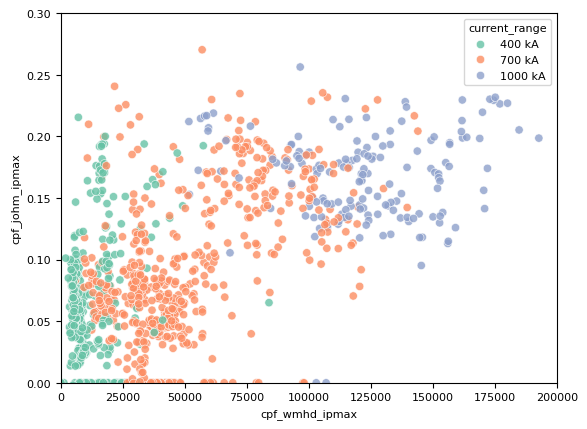

In [92]:
plt.figure()
sns.scatterplot(summary, y='cpf_johm_ipmax', x='cpf_wmhd_ipmax', hue='current_range', alpha=0.8)
plt.xlim(0, 2e5)
plt.ylim(0, .3)

### Plasma Current vs. Confinement Time

This can indicate how the plasma current affects the confinement time, providing insights into stability and performance.

(0.0, 1.0)

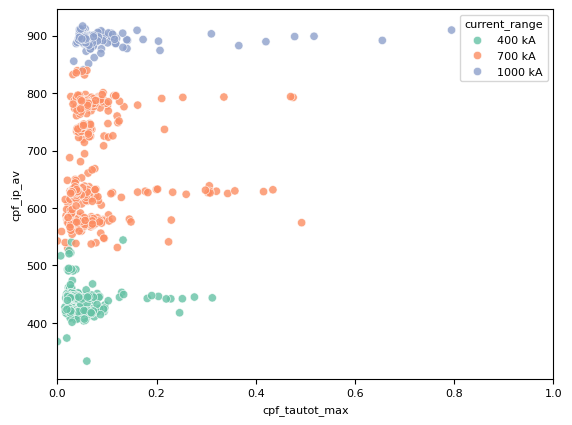

In [137]:
plt.figure()
sns.scatterplot(summary, y='cpf_ip_av', x='cpf_tautot_max', hue='current_range', alpha=0.8)
plt.xlim(0, 1)
# plt.ylim(0, .3)